<a href="https://colab.research.google.com/github/cxbxmxcx/EvolutionaryDeepLearning/blob/main/EDL_2_6_Genetic_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

import os
import time
import cv2
import urllib.request
from IPython.display import clear_output

In [3]:
#initial population
population = 300
genes = 16*16
generations = 10000

pop = np.random.uniform(0,1, size=(population,genes))
print(pop)

[[0.26221467 0.5132462  0.06852858 ... 0.50291897 0.87633672 0.75098625]
 [0.6332051  0.03967353 0.90791563 ... 0.08336439 0.14333942 0.6379571 ]
 [0.25401999 0.84690751 0.67758222 ... 0.59274578 0.85481404 0.64617142]
 ...
 [0.16387855 0.51715547 0.96708731 ... 0.19734203 0.50930047 0.06658052]
 [0.341506   0.24191086 0.92236025 ... 0.98474741 0.82396964 0.21598059]
 [0.75423544 0.85152558 0.81451592 ... 0.13583465 0.61661626 0.958472  ]]


In [4]:
#@title Image Helpers
def load_target_icon(icon_url):
  icon_path = "target_icon"    
  urllib.request.urlretrieve(icon_url,icon_path)
  target = cv2.imread(icon_path, cv2.IMREAD_GRAYSCALE) 
  return cv2.resize(src=target, dsize=(16,16), interpolation=cv2.INTER_AREA)

def show_icon(icon_arr):    
    plt.figure(figsize=(5,5))
    plt.axis("off")
    plt.imshow(icon_arr, cmap='Greys')
    plt.show()

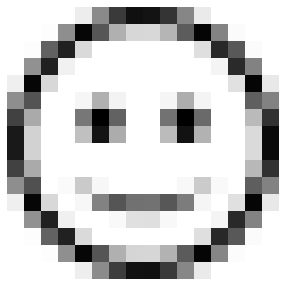

(16, 16)


In [5]:
#@title Default title text { run: "auto" }
target_icon = "Happy" #@param ["Wolf", "Stop Sign", "Plus", "Happy", "Art", "Abstract"]

target_urls = { "Wolf" : 'https://www.clipartmax.com/png/middle/235-2350420_other-wolf-icon-16x16-images-loup-icon.png',
               "Stop Sign" : 'https://images.uline.com/is/image//content/dam/images/H/H2500/H-2381.jpg',
               "Plus" : 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR2NJycvmconYsFlY2cEZRq5we90isDOh5l7hC0vzTxPBgHtfp7DkE9MpEl5P9ViQ_F0VQ&usqp=CAU',
               "Happy" : 'data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOEAAADhCAMAAAAJbSJIAAAAilBMVEUAAAD8/vz///+1t7XLzcspKik2Njb5+/mpqqnx8/Ho6uj3+ffb3duhoqHi5OJsbWx+f37Bw8G6vLp5enmXmJdzdHPNzs1UVVSjpaPm6OYWFhYgICCMjYyGh4ZMTUxcXVxERETW19Y9Pj0oKCgODg5BQUFnZ2eLjIswMDAbHBtPUE9aW1oUFBQiIyKCZkikAAANTklEQVR4nO1dZ5faOhBdC4NNM3UpCXULYbPJ//97zzZdM5JmZNkW7+R+yDkbsKyL2mjqy0sVeG82m++bOO5/NW84VvLq0nH4ns7CUKAIU8wa823dfbTGbjhbLk9cAhQXpklntX66Af3uJ4GGG2QaBPv+ru5eU/E2DqncJJ7t8aRZd++NOMSJBbsbyWjfn9fNQYP5om1P724op3UTwfEWR4XpXUmGw4+6+chYh27Y3UiOXuvmdIfWuOOU35nkclA3sTM+xo5mJ+SY+LAiB8ty6J05isWPevm9JiXyO5EM4vf6+DXHZfPLOUZxTfx+VMIv5ygmdRBsVMUv55hUfnasOzx+6PWJ9fzys0p+Lfr5fibTSDE9tk44TrM/GwmLpwjGPysjuAoo3cp63+32pitNS7/703HUJfIU7WE1/DZdQneyi+3+ldij4WuypJBMRblyqeX46Ju7kkmVQ+YlaL6aEUiKduk7zjYx9CKbcfHmy6btr21snK9C7F1TesTA2IF2XEiz9DpuG19R5hV5rH15tmU6uA6s93qOIijt/N/NdG9Oh2/oSGNmOozE2M17ZGx0rxWOt/L0QNK9rdty+bIzFtrxG+1cv2+qW5Ci++36fbolWAa/DClHzY/ad/w2NUFRzpTJoROe3FJsqd9Usii1Uk9VlxRbkeo1QqzdvQbFbqTkKPpWggWCpopgKmBUYFGZKC9qouNGq3pUEuxUpO5TDqPouGheNUVT8bMyvfRAtauKdvHGVSNYrXXhvaEcxaI/s2oNiqhiO9hUsZ2LTrHtRjlFG446TsenqiuFDg0FwRKlex3CEijiM0MEG2e9ZkGxGAtQxEU10auJ4MvL1jFFBcGZ007zsMVPRmG3rx/wxkLHneZh00N7ZSX8b3CCdVlJrkBVYaJr0RI6H4QHDkw4Rb5iY4+2cyihx2ygE5U9udZoK54Y1vG1yFMyDlCC9W4yd8AmqhCsJvwmqKDI0YajDXhEEJ+ojFNx5T1BBcU34sNfiPmsVkkGBcaQanxDDgrmMq4CmIwqaHo/VJipTdhWY4AwbJMM4dhv48lB+IgRMtcoog32XPU3ehIQWxhhLHbIUw4UWuUAk53/mh5Ctpmu8aG6sIngcCwMzwyRIfRwl7kgRrpreARq0J2bsZxiCfurv2TAIRRJzQ6eevzkDiLUnvtw59VhCnvc03wdquvq11qYgKwr9aC04IgnFfbVDi3OICJD6FNIgALIPFUN4hf8ahWecoUBDkXlIEINsCjNB8El4HVWMYg/4BdL8j1yDSCHKfZHZD57fRTeMIeHImpUBGeh0Hn3egXaIAINqRs3gEoAL+0R4iQC9Gulu8o4BBxEeMy9ge94eytEAFYiIqqAq/0zDSE2iGCXhPtMHR21xm/QffmkA2v1Wc7CC+AgGr/gyiuuIoDTXNadPvsQvnzIy0ySqYFoV+el4tvKwxlslY9ngWznsLgXTsKklyKZ/rbp37WVfW8pRC/5xfZJ2kkEHw3WLfkCwr3a/x1Ft6C7ru058zmLTkEz2b8drgcJmKb3xiTgWBLxYm8fHUBtOTakVjq8cQQr7d6IId8MtcocAOjEK8SS1bkM0DOfGePUBM/fTVP5rGDdKl4x3broMhfSFG2lzXE/AON0Ow+gTMpo91XlQszajeHl9NwKY9+SFeB32yVonuFh9K2OFmAQRIwJl1aoluv0SFQPFBhexk6qjkcUS7KK4F0dHcMxr4PFdt3wAHe6Akrh1Xpqhmzx0EX9MWLx5bl4dc4A7kF0/Qzu3ndB+w+tFcVSPneGrmqAF4zzB32ZOt2xRBuRSHZw0Ufe0qfCBzi2zo78skTHsNpru5aC1MinvhXGIMo/1WUhgibJh5Bij7+1RDJcoV6C962QY8fkLfnypNwgXaDBnQTvmiJNMN1ulbdC3msAw9Pwyz8h416h7xnVicM01en7wpd0gzhTmShPESOgo4AMJwzpPzm4I+ULTjaF2097iKhihuBEzDcCeQPC1MU4TFtEUPkYAoaZcAwObbpQ+sfEj9Y3hwzBistkPuDjR5pZJ5jWIe3INzJkGFAw4UVmyIk/0YWT522ZHJRyGJOJMK6a2BjKKn8OQ1neA33bUVpZmFpheEZ25WePyNWJ4QP1buobqRVwAZdB7xBwthBNKFGwXIT0+bCoamU0euXWCsftjMSQ0Z7+3pM3TwFipbbtEGD4VZCh/gZMtgzoBpHnOQgOxFVRhpo1xIgnUyt7uNp3WaWYKWSKMVTLNYK2kZ6AxzrmPxMva4PsA4YwZPt0q4JzeY63ylaY/sllMMQ7x85XhbfS5RovSmGYboWgdyxN7gkHpBX6JeCCchi+7ELJpmIVQ/Tde+QoxIifOaUkhukFJbykksvzcVtmVPvei7tmxnRt9w2lMXx5+ZyOc+Nhb7QtkKJyMxh1chPkaGfDr1SGnuAfw38M/cc/hv8Y+g8CwyfzSZTx/2dYwv3QM7i/4/sG93oa34Dp2oroS/0DxrCIzts/YDrvInYL/+Da9uQfMNvTH9mAZJM2yxcA16BcnSJbufnqH3+A2oDhZlpRFYkygJuZgBPKU4UDPQJspblOrIA/jW9Q+NMU8InyDcBR4ewBEMgUfa6xqAWQaM5bSgHfRM8AAmPOW0oB/1K/ALMHnf1LC/gI+wUYYnj5BHzwFIkGIMBpeBWxi/jq+wS1r36ReAuPoIm3gDEzhSLsyoPe918TMwOHV3/Pn9Z0nAz0gUbAUfbO2wUsRH0s/kenUUOCs2OozyWjjV0Dzh4m169Ou/KMwgtTrN4vmcR9/CE7hnQrxLJSjpO20TdAG0PKjwM+ZCXIKrsqv42EUdCCcsvDEPBjudMGRVANx89RZto3rXxDLDcUa4xhrpkGS4hx6ZVYjlmQsdmFDKT8knNcgQSEZtk0V9KJkrfVY3iK7TbKkXAWSsoYc+YMiHzmZ+uxNDH2cCo5TPGRk/UX0DoBI6nNa+zsqJWux1JEgMm5tpwIzR46hBGC+WkI/q/b3sWDKSF55TNwq9hOuq4S8tNA2ZQU5XA5ZrLiqltn6VCag1tFcxJBSo4h2yRDt5NUiHboJF/I67578+GjaW8peaKAnooaqrK+603mkFaMZHPVvaOXtkiSnGi5vqzztR0eQhIy573G3OqUfD80Oo/VcqmKTWLSPTCIVH3ND+kFmQNm2JizzpDtfDSTiwELqqEPbKSKnHvIIFLDCaZyJv7cgzKZTSiLaLee7JdIqWPRpjpgwqFRjD2SvpQ6Dm8zJHFH1usoEtO+6iR5X/QXIsILrAu6tR3JfanIUgSzDjPyl66VcWxCC9VDHXrlOnr+0oI5aMfkUvdGCE5AHgzbUd/fkZS8HDtUU10ylMkvZkjzrDzCWDpvlur03QFHwfQdZOWCdpDP+7XYXE23JuZtjJnP20VO9jd7jqkAz9UasHOyO8mr32x0LUhmCcz4Eh87r76r2gifMx7JTAxaWSh9LGojQBEvCLpWRVUH2Q2BxDITZe0y9dnUt0BrlFjmLT/uGiPNoX5hJ0YD2woaVjVKXNeZ+R3HsgRzL9L04wJKHrs6M2iKg6hgmZLNr2HSSbE8ZUTMsVivCmqwbGsFYdmtnFWP3RwOB1daK/t6T+gG5Z/ncIGaXc9Rdw2L4adviU9aO4+TgfxJ6x9yRCLsDPOJYuEaloo6pN6sRQd1SBW1ZD0ZRRe1ZFX1gL0YRbweML+gPV7T2YNRdFXTWVWXu3aK7upy+1lbfYArLa1qq6syw9a6Frf4XUylATZCQbG+UcRk0cBG0XKFgmJdNR9VSWyKRNtFOMWAvzU7gCInVbFwwhZOsY6I709VVwrGSzZV7UZW6il7KPYYB9EhRxVFdoKjInhXLMFAdIgZtTVQTtQKY2sUpyDvSqiGahR5NrAiUNp7XBVOU63F7EpWgXMiLJ9xfX3syoNHNVGzc6PsmkI7tcHOZdT5mzqxoWiXGpCpMUg6DqtXVy8QJXJcBWqTgPO8AZoCDUKMdo7fluHPXJPEV3TdJ0ZY6H5PMXI+jtO2xqYjojJ8Wjc6K5LruZrOT93bZiU57Wqz4QrRaTiS5FqhwSRX3gauq5aScQz2xWWAt/XewK/Um83AYNVNJ2tcqBj7YBmZXtGzvdATkRg5ChHb3ZA/+rHRLs6s42WFFWKZgiMZDnkK2rfNKCSY/UW7iqqFX/r029eRTPavtO11PlkkEcWrQVRWg1knajyy7EbxVNur/rTTNXkzXBtsVxefbNrOJZ7p4mkg0PtfgoaCaqOT1/p88zhPmmupooHlZ6UEXzLvKWfupASCSR11UX84dJk18KtKmQDQHJO2nKL8ojrTA/w2CQDF+QUxryaqczRLnatCLDzI0fFnzNwX6fS6viRTbaVnh3OO6fngVZ6cjSM//Ss90fAuc8XHr8DRbE2bCYelR1BbYb5oFyaZLr7ZqnLxhYFDvLcnmcVJ7QcF0vJXhNZ6TPXwfmQn2o3W82Q0XDRUQWkoNxEk/SfMKrqe9JYdzT3i/NGy01/v6u5rAWy3h1kY7rHbU5j+/3xbeRqYknBspvg5jHMM/mZ/VbTk/gPQmaTgDLt5jAAAAABJRU5ErkJggg==',
               "Art" : "http://www.indianruminations.com/wp-content/uploads/what-is-modern-art-definition-2.jpg",
               "Abstract" : "https://scx2.b-cdn.net/gfx/news/2020/abstractart.jpg"
               }

target_icon_url = target_urls[target_icon]
target = load_target_icon(target_icon_url)
show_icon(target)
print(target.shape)

In [6]:
def render(individual):
  return np.reshape(individual, (-1, 16))

def fitness(individual):
  """Calculates Mean Square Error Fitness for a render"""   
  fitness = (np.square(render(individual) - target)).mean(axis=None)
  return fitness

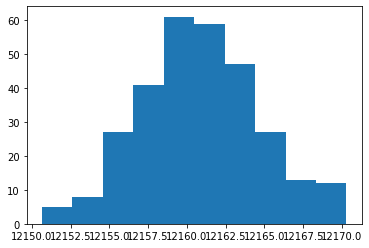

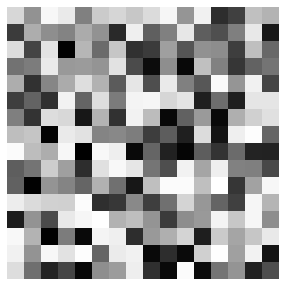

In [7]:
def evaluate(pop):
  return np.array([fitness(ind) for ind in pop])

plt.hist(evaluate(pop))
show_icon(render(pop[0]))

In [8]:
def elite_selection(fitness):
  return fitness.argsort()[:2][::-1] 

parents = elite_selection(evaluate(pop))
print(parents)

[248 121]


In [9]:
def crossover(parent1, parent2, crossover_rate):
  # children are copies of parents by default
  child1, child2 = parent1.copy(), parent2.copy()  
  # check for recombination
  if random.random() < crossover_rate:
    # select crossover point that is not on the end of the string
    pt = random.randint(1, len(parent1)-2)
    # perform crossover    
    child1 = np.concatenate((parent1[:pt], parent2[pt:]))
    child2 = np.concatenate((parent2[:pt], parent1[pt:]))
  return [child1, child2]

crossover(parents[0],parents[1], .15)

[248, 121]

In [10]:
def mutation(individual, mutation_rate):
  for i in range(len(individual)):
	  # check for a mutation
    if random.random() < mutation_rate:      
      individual[i] = individual[i] + random.uniform(-.1,.1)
  return individual

mutation(pop[parents[0]], .5)

array([ 0.34539212,  0.40401526,  0.27621553,  0.99546974,  0.79198344,
        0.88985016,  0.09739713,  0.71448749,  0.74719726,  0.34322608,
        0.30648743,  0.57283565,  0.73161684,  0.01952594,  0.61692905,
        0.92558591,  0.00980196,  0.915847  ,  0.65418312,  0.67498608,
        0.25892708,  0.89247205,  0.04289475,  0.59868846,  0.66438577,
        0.61416077,  0.58894306,  0.87343244,  0.84716344,  0.07529618,
        0.82524581,  0.39246084,  0.71845472,  0.53170255,  0.38349003,
        0.01102109,  0.83075143,  0.38651925,  0.37632878,  0.65439057,
        0.56674136,  0.11963163,  0.95626532,  0.55177511,  0.23351406,
        0.78437642,  0.58580466,  0.46899539,  0.73878558,  0.73546938,
        0.28274986,  0.66761423,  0.82044664,  0.57877673,  0.33610739,
        0.94072548,  0.60028081,  0.4204602 ,  0.3995427 ,  0.40317516,
        0.93354548,  0.54374533, -0.03059829,  0.4436348 ,  0.38850318,
        0.75554668,  0.93972146,  0.75223327,  0.48165194,  0.28

In [11]:
def simple_GA(pop, crossover_rate=.5, mutation_rate=.05):   
  parents = elite_selection(evaluate(pop))
  children = np.zeros((population,genes))  
  for i in range(population):
    offspring = crossover(pop[parents[0]],pop[parents[1]], crossover_rate)
    children[i] = mutation(offspring[0],mutation_rate)  
  return children

pop = simple_GA(pop)
pop = simple_GA(pop)

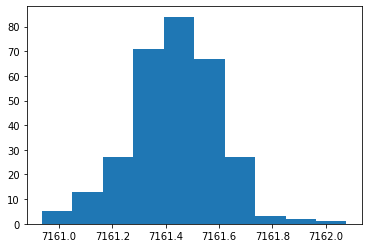

Generation 9901
    Max fitness 7162.077356346125
    Min fitness 7160.936715164056
    Mean fitness 7161.435889846751
    Std fitness 0.16432283021623276


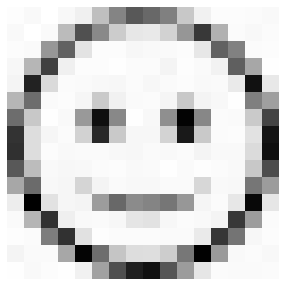

In [12]:
#initial population
pop = np.random.uniform(0,1, size=(population,genes))
render_gen = 100

for i in range(generations):
  pop = simple_GA(pop)
  if i % render_gen == 0:  
    clear_output()
    fit = evaluate(pop) 
    parents = elite_selection(fit) 
    plt.hist(fit)
    plt.show()
    print(f"Generation {i+1}")
    print(f"    Max fitness {np.max(fit)}")
    print(f"    Min fitness {np.min(fit)}")
    print(f"    Mean fitness {np.mean(fit)}")
    print(f"    Std fitness {np.std(fit)}")
    show_icon(render(pop[parents[0]]))
    time.sleep(1)